In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# Select specific columns
columns_to_select = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_selected = df[columns_to_select]
df_selected.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

In [4]:
print("Statistical Summary of fuel efficiency:")
print(df_selected['fuel_efficiency_mpg'].describe())

Statistical Summary of fuel efficiency:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


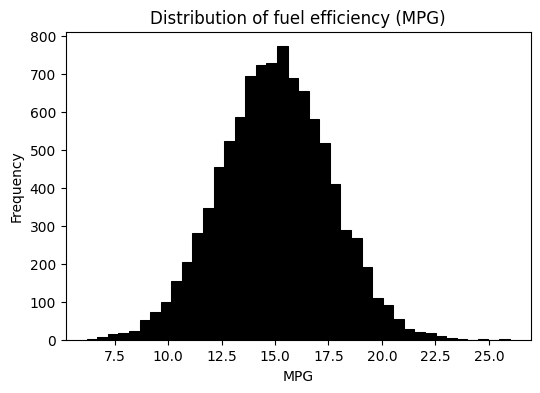

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df_selected.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('MPG')
plt.title('Distribution of fuel efficiency (MPG)')

plt.show()

In [14]:
skewness = df_selected['fuel_efficiency_mpg'].skew()
print(f"\nSkewness: {skewness:.2f}")


Skewness: -0.01


Missing Column

In [6]:
df_selected.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Median

In [7]:
df_selected['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [8]:
np.random.seed(2)

n = len(df_selected)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_selected.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [18]:
# Calculate target variable (y) for train and validation sets
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

# Prepare features (X) by dropping the target column
X_train_df = df_train.drop('fuel_efficiency_mpg', axis=1)
X_val_df = df_val.drop('fuel_efficiency_mpg', axis=1)

### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Linear Regression

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

Handle Missing Values

In [16]:
def prepare_X_zero(df):
    df_filled = df.fillna(0)
    X = df_filled.values
    return X

In [19]:
# Method 1: Fill with zeros
X_train_zero = prepare_X_zero(X_train_df)
X_val_zero = prepare_X_zero(X_val_df)

In [17]:
def prepare_X_mean(df):
    df_filled = df.fillna(df.mean())
    X = df_filled.values
    return X

In [20]:
# Method 2: Fill with mean (using training mean)
train_means = X_train_df.mean()
X_train_mean = prepare_X_mean(X_train_df)
X_val_mean = X_val_df.fillna(train_means).values

Train Model for both methods

In [21]:
def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [ ]:
# Train and evaluate zero-fill model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

rmse_zero = rmse(y_val, y_pred_zero)

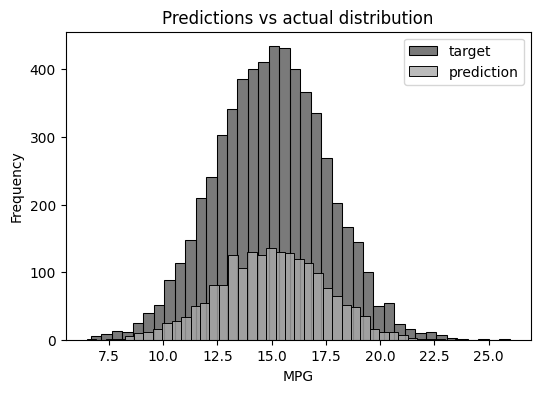

In [25]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_zero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('MPG')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
# Train and evaluate mean-fill model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = rmse(y_val, y_pred_mean)

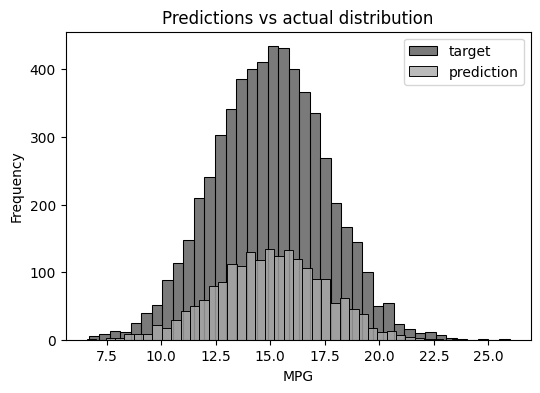

In [26]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('MPG')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
# Compare results
print('RMSE results:')
print(f'Zero-fill method: {rmse_zero}')
print(f'Mean-fill method: {rmse_mean}')

RMSE results:
Zero-fill method: 0.52
Mean-fill method: 0.47


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

Regularization

In [27]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [28]:
# List of regularization values to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Dictionary to store results
rmse_scores = {}

# Train and evaluate model for each r value
for r in r_values:
    # Train model with regularization
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    
    # Make predictions
    y_pred = w0 + X_val_zero.dot(w)
    
    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)
    rmse_scores[r] = rmse_score

# Print results
print("RMSE scores for different r values:")
for r, score in rmse_scores.items():
    print(f"r={r:<4}: {score:.2f}")

RMSE scores for different r values:
r=0   : 0.52
r=0.01: 0.52
r=0.1 : 0.53
r=1   : 0.53
r=5   : 0.53
r=10  : 0.53
r=100 : 0.53


In [29]:
# Find best r
best_r = min(rmse_scores.items(), key=lambda x: x[1])
print(f"\nBest r value: {best_r[0]} (RMSE: {best_r[1]:.2f})")


Best r value: 0 (RMSE: 0.52)


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores?

In [31]:
# List to store RMSE scores for different seeds
rmse_scores = []

# Try different seeds
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Set the seed
    np.random.seed(seed)
    
    # Split the data
    n = len(df_selected)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Create train/val/test splits
    df_shuffled = df_selected.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Prepare X and y
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    
    X_train_df = df_train.drop('fuel_efficiency_mpg', axis=1)
    X_val_df = df_val.drop('fuel_efficiency_mpg', axis=1)
    
    # Fill missing values with 0
    X_train_zero = prepare_X_zero(X_train_df)
    X_val_zero = prepare_X_zero(X_val_df)
    
    # Train model and make predictions
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = w0 + X_val_zero.dot(w)
    
    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)
    rmse_scores.append(rmse_score)

# Calculate standard deviation
std_rmse = np.std(rmse_scores)
print(f"RMSE scores: {rmse_scores}")
print(f"Standard deviation: {round(std_rmse, 3)}")

RMSE scores: [np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.51), np.float64(0.53), np.float64(0.53), np.float64(0.51), np.float64(0.51), np.float64(0.51)]
Standard deviation: 0.007


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [32]:
np.random.seed(9)

# Split the data
n = len(df_selected)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

# Create splits
df_shuffled = df_selected.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation
df_train_full = pd.concat([df_train, df_val])

In [33]:
# Prepare X and y for full training data
y_train_full = df_train_full.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Prepare features
X_train_full = df_train_full.drop('fuel_efficiency_mpg', axis=1)
X_test = df_test.drop('fuel_efficiency_mpg', axis=1)

# Fill missing values with 0
X_train_full_zero = prepare_X_zero(X_train_full)
X_test_zero = prepare_X_zero(X_test)

In [34]:
# Train model with r=0.001
w0, w = train_linear_regression_reg(X_train_full_zero, y_train_full, r=0.001)

# Make predictions on test data
y_pred = w0 + X_test_zero.dot(w)

# Calculate final RMSE on test set
test_rmse = rmse(y_test, y_pred)
print(f"Test RMSE: {test_rmse}")

Test RMSE: 0.52
